Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.ensemble
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

Importing datasets

In [2]:
data1 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/sales_train.csv', encoding = 'utf-8')
data2 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/sales_test.csv', encoding = 'utf-8')
data3 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/calendar.csv', encoding = 'utf-8')
data4 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/inventory.csv', encoding = 'utf-8')
data5 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/solution.csv', encoding = 'utf-8')
data6 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/test_weights.csv', encoding = 'utf-8')
print("Datasets successfully imported")

Datasets successfully imported


checking dtypes of data1, changing date dtype

In [3]:
print(data1.info())
print(data1.isnull().sum()) #info of train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 428.0+ MB
None
unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64


Finding number of null values and total number of values for data missing unique_ids

In [4]:
unique_ids = [885, 1237, 725, 3778, 5152, 2148, 2424, 3178, 1776, 1689, 612, 2809, 794]
filtered = data1[data1['unique_id'].isin(unique_ids)]
results = []
for unique_id in unique_ids:
    current_filtered = filtered[filtered['unique_id'] == unique_id]
    null_1 = current_filtered['total_orders'].isnull().sum()
    non_null_1 = current_filtered['total_orders'].notnull().sum()
    null_2 = current_filtered['sales'].isnull().sum()
    non_null_2 = current_filtered['sales'].notnull().sum()
    results.append({
        'unique_id': unique_id,
        'Null values in total_orders': null_1,
        'Non-null values in total_orders': non_null_1,
        'Null values in sales': null_2,
        'Non-null values in sales': non_null_2
    })
result_data = pd.DataFrame(results)
print(result_data)

    unique_id  Null values in total_orders  Non-null values in total_orders  \
0         885                            4                              294   
1        1237                            2                              528   
2         725                            2                              890   
3        3778                            7                              697   
4        5152                            4                              730   
5        2148                            7                             1046   
6        2424                            8                             1059   
7        3178                            7                             1048   
8        1776                            1                             1039   
9        1689                            2                              400   
10        612                            2                              369   
11       2809                            4          

In [5]:
clean1 = data1.dropna()
print(clean1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4007367 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 458.6+ MB
None


Checking dtypes, null values of data2 and changing the dytypes of date column

In [6]:
print(data2.info())
print(data2.isnull().sum()) #info of test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        47021 non-null  int64  
 1   date             47021 non-null  object 
 2   warehouse        47021 non-null  object 
 3   total_orders     47021 non-null  float64
 4   sell_price_main  47021 non-null  float64
 5   type_0_discount  47021 non-null  float64
 6   type_1_discount  47021 non-null  float64
 7   type_2_discount  47021 non-null  float64
 8   type_3_discount  47021 non-null  float64
 9   type_4_discount  47021 non-null  float64
 10  type_5_discount  47021 non-null  float64
 11  type_6_discount  47021 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.3+ MB
None
unique_id          0
date               0
warehouse          0
total_orders       0
sell_price_main    0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_disco

Checking dtypes, null values of data3 and changing the dytypes of date column

In [7]:
print(data3.info())
print(data3.isnull().sum()) #info of calender set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB
None
date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64


Checking dtypes and null values in data4

In [8]:
print(data4.info())
print(data4.isnull().sum()) #info of inventory set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB
None
unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64


Checking dtypes and null values in data5

In [9]:
print(data5.info())
print(data5.isnull().sum()) #info of solution set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         47021 non-null  object
 1   sales_hat  47021 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 734.8+ KB
None
id           0
sales_hat    0
dtype: int64


Checking dtypes and null values in data6

In [10]:
print(data6.info())
print(data6.isnull().sum()) #info of test weights set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  5390 non-null   int64  
 1   weight     5390 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.3 KB
None
unique_id    0
weight       0
dtype: int64


In [11]:
merge1 = pd.merge(clean1, data6, on='unique_id')
print("Merge successfull")

Merge successfull


In [12]:
merge2 = pd.merge(merge1, data3, on=['date', 'warehouse'])
print("Merge successfull")

Merge successfull


In [13]:
merge3 = pd.merge(merge2, data4, on=['unique_id', 'warehouse'])
print("Merge successfull")

Merge successfull


Spliting date column in merged file for better understanding

In [14]:
merge3['date'] = pd.to_datetime(merge3['date'], errors='coerce')
merge3['day'] = merge3['date'].dt.day
merge3['month'] = merge3['date'].dt.month
merge3['year'] = merge3['date'].dt.year
print("Procedure successfull")

Procedure successfull


In [15]:
print(merge3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007367 entries, 0 to 4007366
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  weight                  float64       
 15  holiday_name            object        
 16  holiday                 int64         
 17  shops_closed            int64         
 18  wi

In [16]:
merge4 = pd.merge(data2, data3, on=['date', 'warehouse'])
print("Merge successfull")

Merge successfull


In [17]:
merge5 = pd.merge(merge4, data4, on=['unique_id', 'warehouse'])
print("Merge successfull")

Merge successfull


In [18]:
merge5.insert(4, 'sales', [None] * len(merge5))
print("Column created successfully")

Column created successfully


In [19]:
merge5.insert(6, 'availability', [None] * len(merge5))
print("Column created successfully")

Column created successfully


In [20]:
merge5.insert(14, 'weight', [None] * len(merge5))
print("Column created successfully")

Column created successfully


Spliting date column in merged file for better understanding

In [21]:
merge5['date'] = pd.to_datetime(merge5['date'], errors='coerce')
merge5['day'] = merge5['date'].dt.day
merge5['month'] = merge5['date'].dt.month
merge5['year'] = merge5['date'].dt.year
print("Procedure successfull")

Procedure successfull


In [22]:
print(merge5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   unique_id               47021 non-null  int64         
 1   date                    47021 non-null  datetime64[ns]
 2   warehouse               47021 non-null  object        
 3   total_orders            47021 non-null  float64       
 4   sales                   0 non-null      object        
 5   sell_price_main         47021 non-null  float64       
 6   availability            0 non-null      object        
 7   type_0_discount         47021 non-null  float64       
 8   type_1_discount         47021 non-null  float64       
 9   type_2_discount         47021 non-null  float64       
 10  type_3_discount         47021 non-null  float64       
 11  type_4_discount         47021 non-null  float64       
 12  type_5_discount         47021 non-null  float6

In [23]:
merge6 = pd.concat([merge3, merge5], axis=0, ignore_index=True)
print(merge6.info())
print(merge6.notnull().sum())

C:\Users\HP\AppData\Local\Temp\ipykernel_19892\2144504375.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merge6 = pd.concat([merge3, merge5], axis=0, ignore_index=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054388 entries, 0 to 4054387
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  weight                  float64       
 15  holiday_name            object        
 16  holiday                 int64         
 17  shops_closed            int64         
 18  wi

In [24]:
def make_time_features(merge3):
    merge3['day'] = merge3['date'].apply(lambda x: x.dayofweek)
    merge3['week'] = merge3['date'].apply(lambda x: x.week)
    merge3['month'] = merge3['date'].apply(lambda x: x.month)
    merge3['day_of_week'] = merge3['date'].apply(lambda x: x.strftime('%A'))
    merge3['week_number'] = merge3['date'].dt.isocalendar().week
    merge3['day_in_month'] = merge3['date'].apply(lambda x: x.day)
    merge3["day_of_year"] = merge3["date"].apply(lambda x: x.timetuple().tm_yday)
    merge3['year'] = merge3['date'].apply(lambda x: x.year)
    merge3['quarter'] = merge3['date'].apply(lambda x: x.quarter)

    merge3['sin_month']=np.sin(2*np.pi*merge3['month']/12)
    merge3['sin_day']=np.sin(2*np.pi*merge3['day']/7)
    merge3['sin_week']=np.sin(2*np.pi*merge3['week']/53)
    merge3['sin_day_year']=np.sin(2*np.pi*merge3['day_of_year']/365)

    min_date = merge3["date"].min()
    merge3["days_since_start"] = merge3["date"].apply(lambda x: (x-min_date).days)

In [25]:
make_time_features(merge3)
make_time_features(merge5)

In [26]:
def assign_around_hol(merge3, original =  1):
    merge3["holiday_name"] = merge3["holiday_name"].fillna("")
    for warehouse in merge3["warehouse"].unique():
        merge3 = merge3[merge3["warehouse"]==warehouse].copy()
        merge3["holiday"] = -2*merge3["holiday"].shift(-1).fillna(0) + merge3["holiday"] + 2*merge3["holiday"].shift(1).fillna(0)
        
        merge3["holiday_name"] = merge3["holiday_name"] + (merge3["holiday_name"] == "")* merge3["holiday_name"].shift(1).fillna("")
        merge3["holiday_name"] = merge3["holiday_name"] + (merge3["holiday_name"] == "")* merge3["holiday_name"].shift(-1).fillna("")
        
        merge3.loc[merge3["warehouse"]==warehouse] = merge3

In [27]:
assign_around_hol(merge3)
assign_around_hol(merge5)

In [28]:
encoder_holiday = LabelEncoder()
merge3['holiday_name_encoded'] = encoder_holiday.fit_transform(merge3['holiday_name'])

In [29]:
models = {}
seasonal_data = {}
shops_data = {}
winter_data = {}
school_data = {}
holiday_data = {}

# Set up the grid search parameters for the XGBoost model
parameter_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300,500],
    'learning_rate': [0.01, 0.1, 0.2]
}

<IPython.core.display.Javascript object>

Warehouse: Budapest_1
(574582, 41)


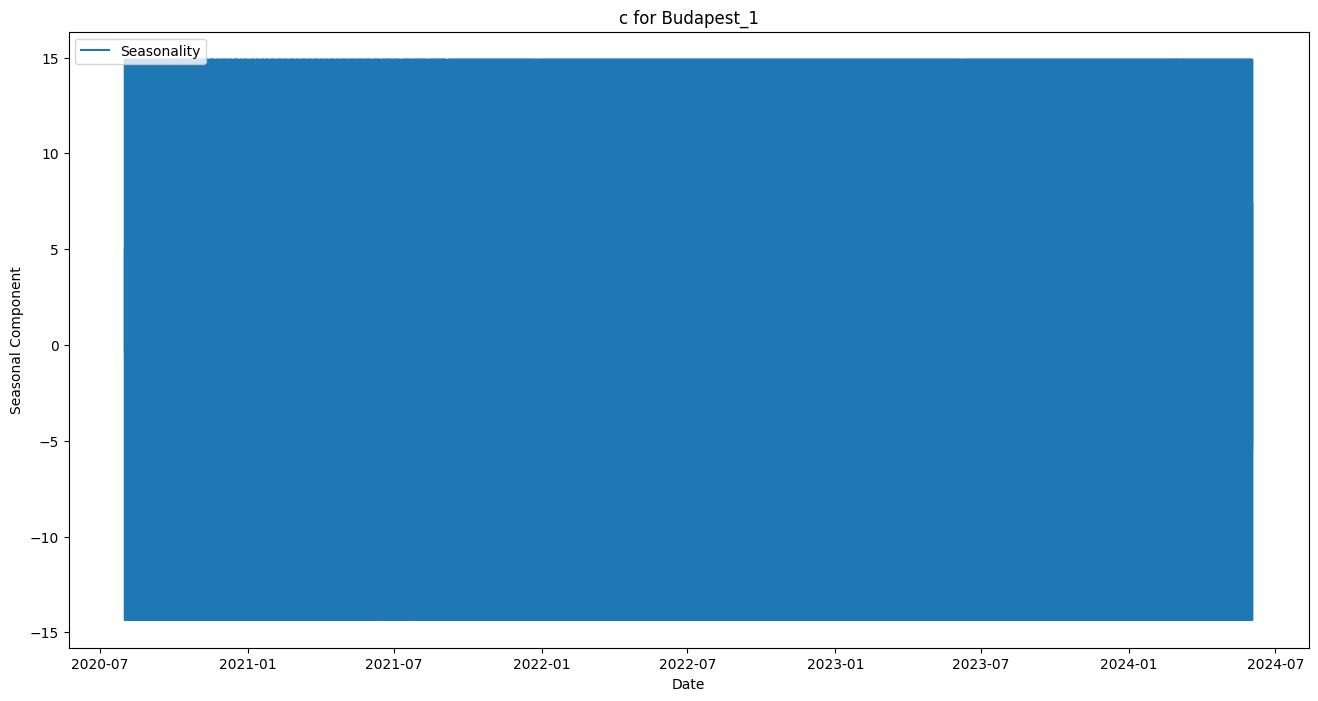

Best Parameters for Budapest_1: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
MAPE for Budapest_1: 1592140026174706.8


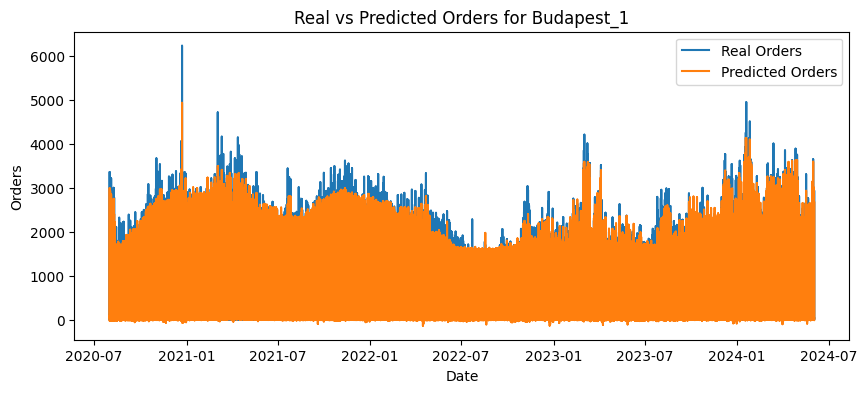

Warehouse: Prague_2
(770709, 41)


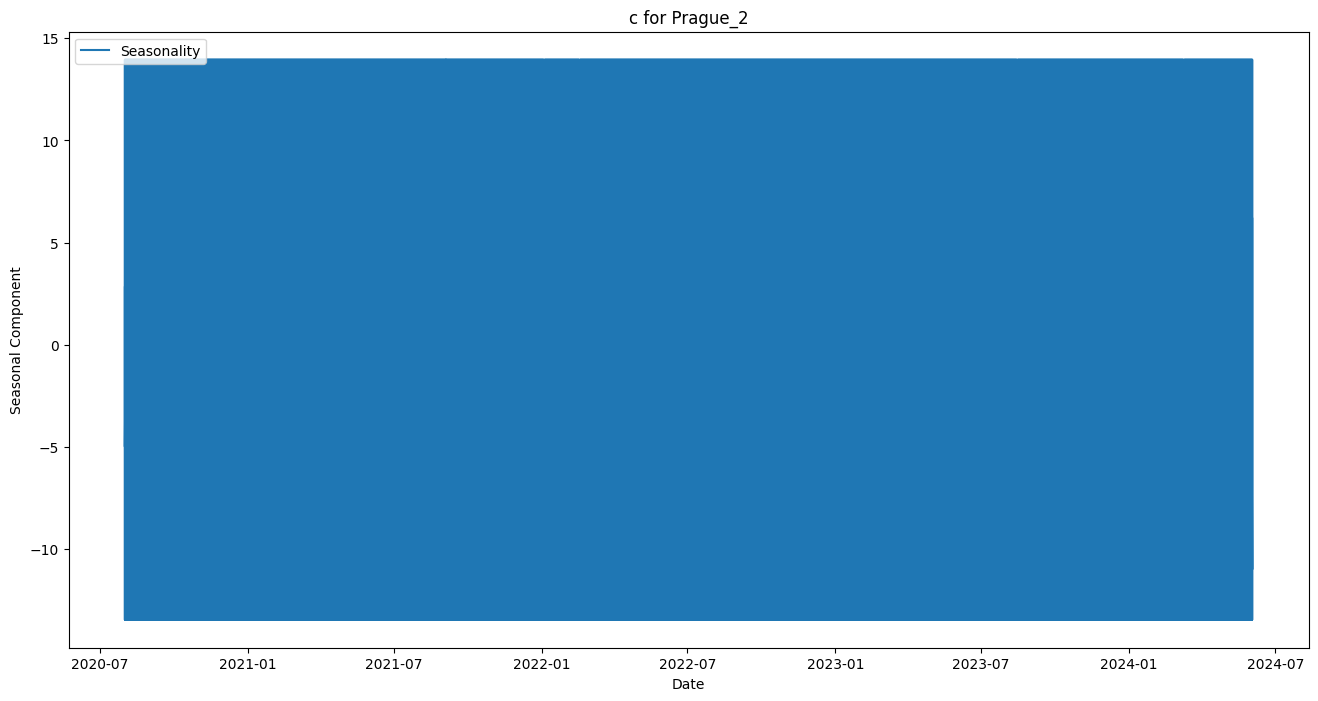


KeyboardInterrupt



In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit

columns_to_drop = ['name', 'L1_category_name_en', 'L2_category_name_en', 'L3_category_name_en', 
                   'L4_category_name_en', 'day_of_week', 'holiday_name']

warehouse_merge3_data = merge3.drop(columns=columns_to_drop)

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

for warehouse in merge3['warehouse'].unique():
    print(f'Warehouse: {warehouse}')
    warehouse_merge3 = merge3[merge3['warehouse'] == warehouse]
    warehouse_merge3_data = warehouse_merge3.sort_values('date',ascending = True)
    print(warehouse_merge3_data.shape)
    
    if warehouse_merge3_data.shape[0] > 2 * 365 and (warehouse != 'Munich_1' and warehouse!='Frankfurt_1'):
        result = seasonal_decompose(warehouse_merge3_data['sales'], model='additive', period=365)
    elif warehouse_merge3_data.shape[0] < 2 * 365 and (warehouse != 'Munich_1' and warehouse!='Frankfurt_1'):
        result = seasonal_decompose(warehouse_merge3_data['sales'], model='additive', period= 365//2)
    elif warehouse == 'Munich_1':
         result = seasonal_decompose(warehouse_merge3_data['sales'], model='additive', period= 365//2)
    elif warehouse == 'Frankfurt_1':
         result = seasonal_decompose(warehouse_merge3_data['sales'], model='additive', period= 365//2)
        
    warehouse_merge3_data['seasonality'] = result.seasonal

    seasonal_data = warehouse_merge3_data.groupby(['warehouse', 'week_number'])['seasonality'].mean().reset_index()
    seasonal_data[f'season_{warehouse}'] = seasonal_data['seasonality']
    shops_data[warehouse] = warehouse_merge3_data.groupby(['warehouse', 'week_number'])['shops_closed'].mean().reset_index()
    winter_data[warehouse] = warehouse_merge3_data.groupby(['warehouse', 'week_number'])['winter_school_holidays'].mean().reset_index()
    school_data[warehouse] = warehouse_merge3_data.groupby(['warehouse', 'week_number'])['school_holidays'].mean().reset_index()
    holiday_data[warehouse] = warehouse_merge3_data.groupby(['warehouse', 'week_number'])['holiday'].mean().reset_index()
    
    plt.figure(figsize=(16, 8))
    plt.plot(warehouse_merge3_data['date'], warehouse_merge3_data['seasonality'], label='Seasonality')
    plt.title(f'c for {warehouse}')
    plt.xlabel('Date')
    plt.ylabel('Seasonal Component')
    plt.legend()
    plt.show()
    
    warehouse_merge3_data = warehouse_merge3_data.sort_values(['date'], ascending=True)
    X = warehouse_merge3_data.drop(columns=['date', 'sales', 'warehouse', 'holiday_name_encoded', 'unique_id'])  # Assuming these are the features to use
    y = warehouse_merge3_data['sales']

    X = X.select_dtypes(include=[int, float])

    tscv = TimeSeriesSplit(n_splits=5)
    model = XGBRegressor(objective='reg:squarederror', random_state=SEED)
    grid_search = GridSearchCV(model, parameter_grid, scoring='neg_mean_squared_error', cv=tscv)
    grid_search.fit(X, y)
    
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X)
    mape = mean_absolute_percentage_error(y, predictions)
    models[warehouse] = best_model
    
    print(f"Best Parameters for {warehouse}: {grid_search.best_params_}")
    print(f"MAPE for {warehouse}: {mape}")

    plt.figure(figsize=(10, 4))
    plt.plot(warehouse_merge3_data['date'], y, label='Real Orders')
    plt.plot(warehouse_merge3_data['date'], predictions, label='Predicted Orders')
    plt.title(f'Real vs Predicted Orders for {warehouse}')
    plt.xlabel('Date')
    plt.ylabel('Orders')
    plt.legend()
    plt.show()